# Importing Libraries

In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

import pandas as pd
import seaborn as sns

import h5py

import time 

from scipy.stats import pearsonr
from scipy.stats import rankdata

from scipy.stats import linregress

#### Creating Function 
##### Defining the xticks for longitude
##### Defining the yticks for latitude

In [3]:
def label_latlon(ax,lons,lats):
    """ Add tick labels """
    # Define the xticks for longtitude
    ax.set_xticks(lons,crs=ccrs.PlateCarree())
    lon_formatter=cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Define ytick for latitude
    ax.set_yticks(lats,crs=ccrs.PlateCarree())
    lat_formatter=cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)

    return

##### Function for climatology and anomalies

In [4]:
def climo(ds):
    ds_climo = ds.groupby('time.month').mean(dim='time') # Calculating the climatology
    return ds_climo
def anoms(ds):
    ds_climo= ds.groupby('time.month').mean(dim='time') # Calculating the anomalies
    ds_anoms = ds.groupby('time.month')-ds_climo
    return ds_anoms

## ESA Climate Change Initiative (CCI) SM v07.1

#### Read in monthly Soil Moisture data

In [5]:
file = '/scratch/ntavakol/ntavakol/CCI_Final/CCI_Lon_Monthly.nc'
ds_sm = xr.open_dataset(file)
ds_sm

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 1440, lat: 600)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
  * lat        (lat) float64 89.88 89.62 89.38 89.12 ... -59.38 -59.62 -59.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

##### Selecting Case study (Australia)

In [6]:
ds_sm1=ds_sm.sel(lon=slice(112,155),lat=slice(-10,-45))
ds_sm1

<xarray.Dataset>
Dimensions:    (time: 120, bnds: 2, lon: 172, lat: 140)
Coordinates:
  * time       (time) datetime64[ns] 2011-01-16 ... 2020-12-16
  * lon        (lon) float64 112.1 112.4 112.6 112.9 ... 154.1 154.4 154.6 154.9
  * lat        (lat) float64 -10.12 -10.38 -10.62 ... -44.38 -44.62 -44.88
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] 2011-01-01 2011-01-31 ... 2020-12-31
    sm         (time, lat, lon) float32 ...
Attributes: (12/47)
    CDI:                          Climate Data Interface version 1.9.10 (http...
    Conventions:                  CF-1.9
    source:                       WARP 5.5R1.1/AMI-WS/ERS12 Level 2 Soil Mois...
    institution:                  TU Wien (AUT); VanderSat B.V. (NL)
    title:                        ESA CCI Surface Soil Moisture COMBINED acti...
    contact:                      cci_sm_contact@eodc.eu
    ...                           ...
    geospatial_lon_resolution:    0.25 degree
    spatial_resolution:           25km
    time_coverage_start:          20110101T000000Z
    time_coverage_end:            20110101T235959Z
    frequency:                    mon
    CDO:                          Climate Data Operators version 1.9.10 (http...

### TerraClimate

#### Read in monthly Actual Evapotranspiration data

In [7]:
file = '/scratch/ntavakol/ntavakol/aet/TerraClimate_aet.nc'
ds_aet = xr.open_dataset(file)
ds_aet

<xarray.Dataset>
Dimensions:  (time: 120, lon: 8640, lat: 4320)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.9 ... 179.9 179.9 180.0
  * lat      (lat) float64 89.98 89.94 89.9 89.85 ... -89.85 -89.9 -89.94 -89.98
Data variables:
    crs      int16 ...
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

##### Selecting Case study (Australia)

In [8]:
ds_aet1=ds_aet.sel(lon=slice(113,154),lat=slice(-10,-44))
ds_aet1

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
Data variables:
    crs      int16 1
    aet      (time, lat, lon) float32 ...
Attributes: (12/51)
    CDI:                             Climate Data Interface version 1.9.10 (h...
    Conventions:                     CF-1.6
    source:                          WorldClim v2.0 (2.5m), CRU Ts4.0, JRA-55
    institution:                     University of California Merced
    method:                          These layers from TerraClimate were deri...
    title:                           TerraClimate: monthly climate and climat...
    ...                              ...
    geospatial_vertical_units:       None
    geospatial_vertical_resolution:  0.0
    geospatial_vertical_positive:    Up
    references:                      Abatzoglou, J.T., S.Z. Dobrowski, S.A. P...
    version:                         v1.0
    CDO:                             Climate Data Operators version 1.9.10 (h...

### Read in monthly Southern Oscillation Index data

In [9]:
file = "/home/ntavakol/Assignment3/SOI.csv"
df = pd.read_csv(file)
df

,YEAR,MONTH,SOI
0,2011,1,1.7
1,2011,2,2.0
2,2011,3,1.8
3,2011,4,1.2
4,2011,5,0.4
...,...,...,...
115,2020,8,1.0
116,2020,9,1.3
117,2020,10,0.8
118,2020,11,1.1


#### Converting CSV file into an xarray. Dataset

In [10]:
start_date=str(df.YEAR[0])+'-'+str(df.MONTH[0])+'-01'
end_date=str(df.YEAR[119])+'-'+str(df.MONTH[119])+'-01'
print(start_date)
print(end_date)

2011-1-01
2020-12-01


In [11]:
dates=pd.date_range(start=start_date,end=end_date,freq='MS')
dates

DatetimeIndex(['2011-01-01', '2011-02-01', '2011-03-01', '2011-04-01',
               '2011-05-01', '2011-06-01', '2011-07-01', '2011-08-01',
               '2011-09-01', '2011-10-01',
               ...
               '2020-03-01', '2020-04-01', '2020-05-01', '2020-06-01',
               '2020-07-01', '2020-08-01', '2020-09-01', '2020-10-01',
               '2020-11-01', '2020-12-01'],
              dtype='datetime64[ns]', length=120, freq='MS')

In [12]:
ds_index=xr.DataArray(df['SOI'],
                      coords={'time':dates},
                              dims=['time'])        
ds_index=ds_index.to_dataset(name='SOI')
ds_index

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
Data variables:
    SOI      (time) float64 1.7 2.0 1.8 1.2 0.4 0.6 ... 0.6 1.0 1.3 0.8 1.1 1.4

### Monthly AET Anomaly

##### Calculating the climatology for monthly averaged AET data

In [13]:
aet_climo_month = climo (ds_aet1)
aet_climo_month

<xarray.Dataset>
Dimensions:  (lon: 984, lat: 816, month: 12)
Coordinates:
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (month) float64 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
    aet      (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating monthly Anomalies for AET by subtracting the climatology from the original data

In [14]:
aet_anoms_month = anoms (ds_aet1)
aet_anoms_month

<xarray.Dataset>
Dimensions:  (time: 120, lon: 984, lat: 816)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
  * lon      (lon) float64 113.0 113.1 113.1 113.1 ... 153.9 153.9 153.9 154.0
  * lat      (lat) float64 -10.02 -10.06 -10.1 -10.15 ... -43.9 -43.94 -43.98
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating mean AET over the entire domain

In [15]:
aet_anoms_month1 = aet_anoms_month.mean(dim=['lat','lon'])
aet_anoms_month1

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    crs      (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0 0.0
    aet      (time) float32 8.098 28.93 27.52 6.639 ... 2.326 8.398 -14.61 28.58

### Monthly SM Anomaly

##### Calculating the climatology for monthly averaged soil moisture data

In [16]:
ds_climo_sm = climo (ds_sm1)
ds_climo_sm

<xarray.Dataset>
Dimensions:  (lon: 172, lat: 140, month: 12)
Coordinates:
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 154.1 154.4 154.6 154.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -44.38 -44.62 -44.88
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (month, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

##### Calculating Anomalies by subtracting the climatology from the original data

In [17]:
ds_anoms_sm = anoms (ds_sm1)
ds_anoms_sm

<xarray.Dataset>
Dimensions:  (time: 120, lon: 172, lat: 140)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16 2011-02-14T12:00:00 ... 2020-12-16
  * lon      (lon) float64 112.1 112.4 112.6 112.9 ... 154.1 154.4 154.6 154.9
  * lat      (lat) float64 -10.12 -10.38 -10.62 -10.88 ... -44.38 -44.62 -44.88
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (time, lat, lon) float32 nan nan nan nan nan ... nan nan nan nan

#### Calculating mean SM over the entire domain

In [18]:
ds_anoms_sm1 = ds_anoms_sm.mean(dim=['lat','lon'])
ds_anoms_sm1

<xarray.Dataset>
Dimensions:  (time: 120)
Coordinates:
  * time     (time) datetime64[ns] 2011-01-16 2011-02-14T12:00:00 ... 2020-12-16
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    sm       (time) float32 0.02646 0.04981 0.05406 ... -0.007442 0.0137

#### Calculating 15 and 85 percentages of SOI to determine a threshold for El Nino, La Nino, and Neutral phases

In [19]:
np.quantile(ds_index['SOI'], 0.15)

-0.7300000000000004

In [20]:
np.quantile(ds_index['SOI'], 0.85)

1.0

In [21]:
elnino = ds_index['SOI'].where(ds_index['SOI']<=-0.73)
lanina = ds_index['SOI'].where(ds_index['SOI']>=1.0)
neutral=ds_index['SOI'].where((ds_index['SOI']>-0.73) & (ds_index['SOI']<1.0))

In [22]:
elnino

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan, -1. ,  nan, -0.9, -1.1, -1.8, -1.9, -1.7,
       -2.2, -2.2, -2.1, -2.1, -3.2, -1.8, -2.6, -1.2, -1. ,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1. ,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan, -1.4, -1.2,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [23]:
lanina

<xarray.DataArray 'SOI' (time: 120)>
array([1.7, 2. , 1.8, 1.2, nan, nan, nan, nan, 1. , 1.2, 1.4, 1.3, 1.8,
       1.5, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1.1,
       nan, nan, 1.2, 1.2, 1. , nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, 1.5, nan, 1.3, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 1. , 1.3,
       nan, 1.1, 1.4])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

In [24]:
neutral

<xarray.DataArray 'SOI' (time: 120)>
array([ nan,  nan,  nan,  nan,  0.4,  0.6,  0.4,  0.5,  nan,  nan,  nan,
        nan,  nan,  nan,  0.1,  0.2,  0.1,  0. , -0.2,  0.2,  0.4,  0.4,
        0.6,  0.6,  0. ,  nan,  0.3,  0.8,  nan,  nan,  nan,  0.5,  0.5,
        0. ,  0.6,  0.8, -0.2,  0. ,  0. , -0.6,  0.4,  0.2,  0.1,  0.1,
       -0.1,  0.1,  0. , -0.1,  nan, -0.5,  nan,  nan,  nan,  nan,  nan,
        nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  0. , -0.1,
        0.3,  0.4,  0.6,  0.2,  0.2,  0.5,  0.8,  0.1,  0. ,  nan,  0.2,
       -0.1,  0.2,  0.5,  0.5,  0.3,  nan,  0.9,  nan,  0.5,  0.1,  0.9,
        0.6,  0.1,  0.4,  0.4, -0.7, -0.3, -0.6, -0.2, -0.6,  nan,  nan,
        0. , -0.5, -0.3, -0.2,  0. , -0.1,  0.1, -0.3,  0. , -0.1, -0.6,
        0.4,  0.3,  0.8,  0.6,  0.6,  nan,  nan,  0.8,  nan,  nan])
Coordinates:
  * time     (time) datetime64[ns] 2011-01-01 2011-02-01 ... 2020-12-01

#### Plotting monthly SOI from 2011 to 2020

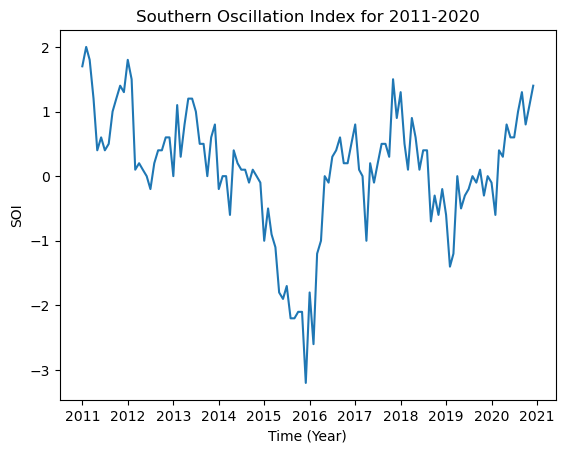

In [25]:
plt.plot(ds_index['time'],ds_index['SOI']) 
plt.title('Southern Oscillation Index for 2011-2020')
plt.ylabel('SOI')
plt.xlabel('Time (Year)')
plt.savefig('Southern Oscillation Index for 2011-2020.png', dpi=300, bbox_inches='tight');

#### Plotting monthly SOI from 2011 to 2020 showing El Nino, La Nino, and Neutral phases

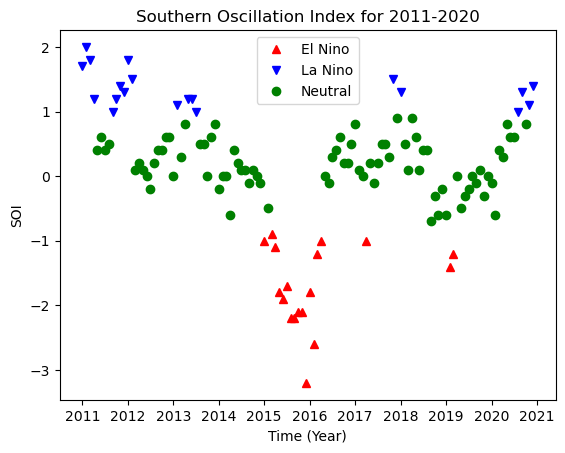

In [26]:
plt.plot(ds_index['time'],elnino,'r^', label="El Nino")
plt.plot(ds_index['time'],lanina,'bv',label="La Nino")
plt.plot(ds_index['time'],neutral,'go',label="Neutral") ;
plt.legend(loc='upper center')
plt.title('Southern Oscillation Index for 2011-2020')
plt.ylabel('SOI')
plt.xlabel('Time (Year)')
plt.savefig('Southern Oscillation Index for 2011-2020_1.png', dpi=300, bbox_inches='tight');

#### Plotting monthly SOI from 2011 to 2020 showing El Nino, La Nino, and Neutral phases

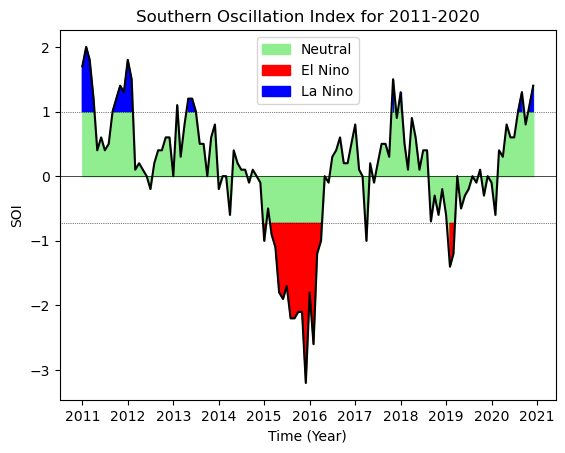

In [27]:
plt.plot(ds_index['time'],df['SOI'],'k')
plt.fill_between(ds_index['time'].values,ds_index['SOI'],color='lightgreen',label="Neutral")
plt.fill_between(ds_index['time'].values,elnino,y2=-0.73,color='red',label="El Nino")
plt.fill_between(ds_index['time'].values,lanina,y2=1.0,color='blue',label="La Nino")
plt.axhline(0,color='black',linewidth=0.5)
plt.axhline(1.0,color='black',linewidth=0.5,linestyle='dotted')
plt.axhline(-0.73,color='black',linewidth=0.5,linestyle='dotted') 
plt.xlabel("Time (Year)")
plt.ylabel("SOI")
plt.legend(loc='upper center')
plt.title('Southern Oscillation Index for 2011-2020')
plt.savefig('Southern Oscillation Index for 2011-2020_2.png', dpi=300, bbox_inches='tight');

### Plotting monthly SOI & AET from 2011 to 2020 showing El Nino, La Nino, and Neutral phases

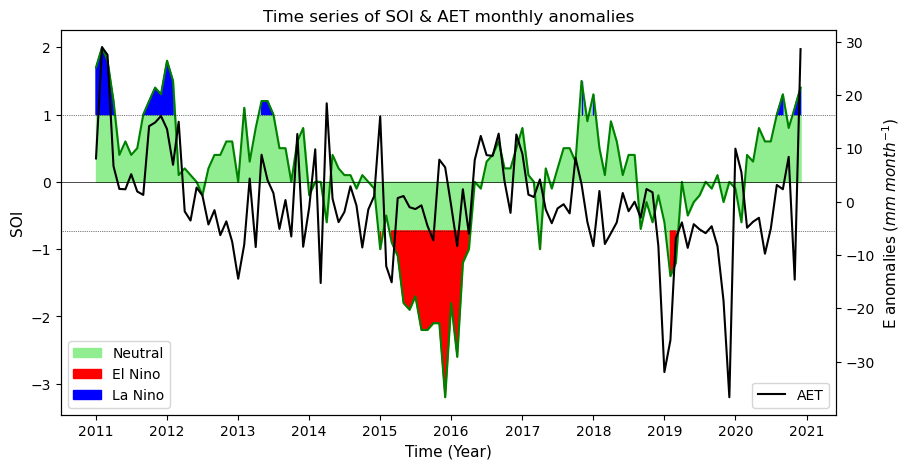

<Figure size 640x480 with 0 Axes>

In [28]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10, 5))
# make a plot
ax.plot(ds_index['time'],df['SOI'],'g')
ax.fill_between(ds_index['time'].values,ds_index['SOI'],color='lightgreen',label="Neutral")
ax.fill_between(ds_index['time'].values,elnino,y2=-0.73,color='red',label="El Nino")
ax.fill_between(ds_index['time'].values,lanina,y2=1.0,color='blue',label="La Nino")
ax.axhline(0,color='black',linewidth=0.5)
ax.axhline(1.0,color='black',linewidth=0.5,linestyle='dotted')
ax.axhline(-0.73,color='black',linewidth=0.5,linestyle='dotted') 
# set x-axis label
ax.set_xlabel("Time (Year)", fontsize = 11)
# set y-axis label
ax.set_ylabel("SOI",
              color="k",
              fontsize=11)
# set title
plt.title('Time series of SOI & AET monthly anomalies')
# add legend
ax.legend(loc='lower left')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(aet_anoms_month1['time'],aet_anoms_month1['aet'],'k', label="AET")
ax2.set_ylabel('E anomalies ($mm\;month^{-1}$)', color = 'k',fontsize=11)
ax2.legend(loc='lower right')
plt.show()
plt.savefig('Time series of AET & SOI monthly anomalies.png', dpi=300, bbox_inches='tight');

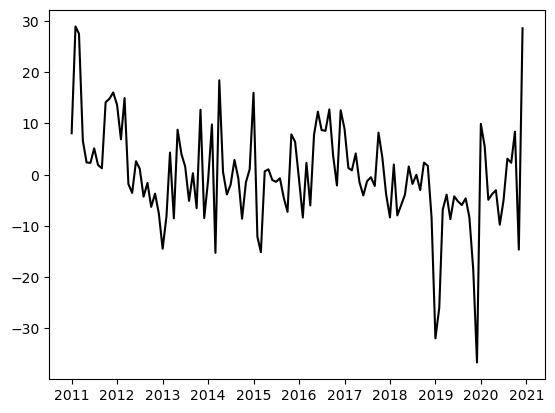

In [29]:
plt.plot(aet_anoms_month1['time'],aet_anoms_month1['aet'],'k', label="AET")

### Plotting monthly SOI & SM from 2011 to 2020 showing El Nino, La Nino, and Neutral phases

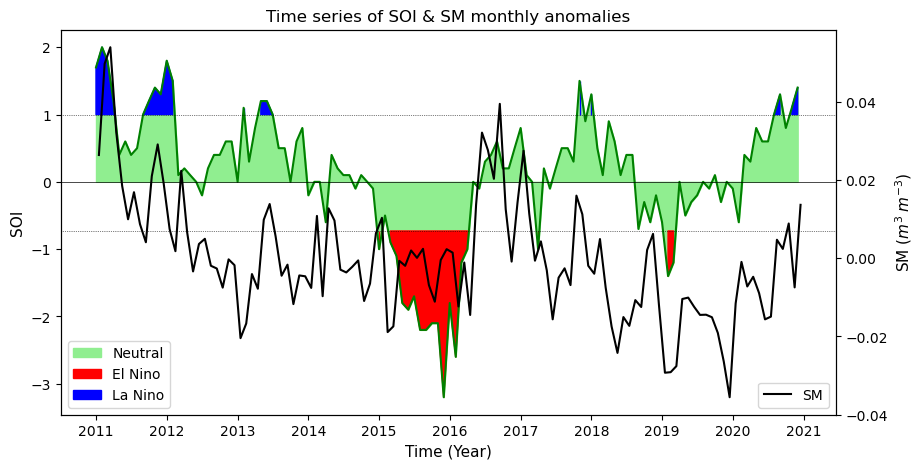

<Figure size 640x480 with 0 Axes>

In [30]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize = (10, 5))
# make a plot
ax.plot(ds_index['time'],df['SOI'],'g')
ax.fill_between(ds_index['time'].values,ds_index['SOI'],color='lightgreen',label="Neutral")
ax.fill_between(ds_index['time'].values,elnino,y2=-0.73,color='red',label="El Nino")
ax.fill_between(ds_index['time'].values,lanina,y2=1.0,color='blue',label="La Nino")
ax.axhline(0,color='black',linewidth=0.5)
ax.axhline(1.0,color='black',linewidth=0.5,linestyle='dotted')
ax.axhline(-0.73,color='black',linewidth=0.5,linestyle='dotted') 
# set x-axis label
ax.set_xlabel("Time (Year)", fontsize = 11)
# set y-axis label
ax.set_ylabel("SOI",
              color="k",
              fontsize=11)
# set title
plt.title('Time series of SOI & SM monthly anomalies')
# add legend
ax.legend(loc='lower left')
# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(ds_anoms_sm1['time'],ds_anoms_sm1['sm'],'k', label="SM")
ax2.set_ylabel('SM ($m^{3}\;m^{-3}$)', color = 'k',fontsize=11)
ax2.legend(loc='lower right')
plt.show()
plt.savefig('Time series of SM & SOI monthly anomalies.png', dpi=300, bbox_inches='tight');

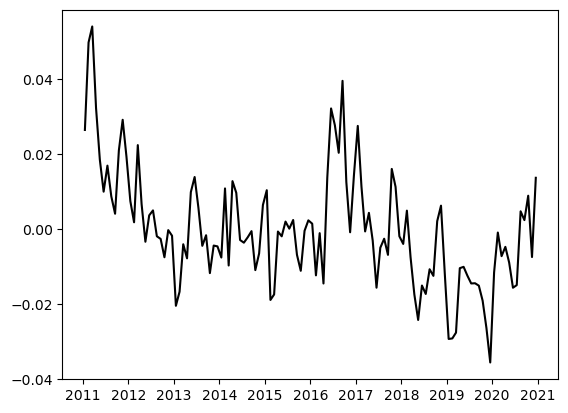

In [31]:
plt.plot(ds_anoms_sm1['time'],ds_anoms_sm1['sm'],'k', label="SM")